## UNSUPERVISED LEARNING PROJECT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

### Part A - 30 Marks

- **DOMAIN** **_:_** Automobile

- **CONTEXT** **_:_** The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5
    continuous attributes.

- **DATA DESCRIPTION** **_:_**

<table style="border:1px solid black;margin-left:auto;margin-right:auto;">
    <tr>
        <td><b>cylinders:</b> multi-valued discrete</td>
        <td><b>acceleration:</b> continuous</td>
    </tr>
    <tr style="background-color: gray">
        <td><b>displacement:</b> continuous</td>
        <td><b>model year:</b> multi-valued discrete</td>
    </tr>
    <tr>
        <td><b>horsepower:</b> continuous</td>
        <td><b>origin:</b> multi-valued discrete</td>
    </tr>
    <tr style="background-color: gray">
        <td><b>weight:</b> continuous</td>
        <td><b>car name:</b> string (unique for each instance)</td>
    </tr>
    <tr>
        <td><b>mpg:</b> continuous</td>
        <td></td>
    </tr>
</table>
    
- **PROJECT OBJECTIVE** **_:_** To understand K-means Clustering by applying on the Car Data set to segment the cars into various categories.

- **STEPS AND TASK [30 Marks]:**

1. Data Understanding & Exploration: [5 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark] </li>
    <li> Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark] </li>
    <li> Merge both the DataFrames together to form a single DataFrame [2 Mark] </li>
    <li> Print 5 point summary of the numerical features and share insights. [1 Marks] </li>
    </ol>

In [2]:
# 1A. Read 'Car name.csv' and assign it to a variable 
car_name = pd.read_csv('Car name.csv')

# 1B. Read 'Car-aatributes.json' and assign it to a variable
car_attributes = pd.read_json('Car-Attributes.json')

# 1C. Merge both the DataFrames together to form a singlr DataFrame
car_data = [car_name, car_attributes]
car_data = pd.concat(car_data, axis=1)

# 1D. Print 5 point summary of the numerical features and share insights. 
car_data.describe().T


,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


#### Insights from the 5 point summary

- The information shown for the numerical columns
- We can find minimum, maximum, 25th/50th/75th percentilie value of each numerical column along with corresponding mean and standard deviation.
- Total count of data rows also can be found - there are 398 rows.
- Looks like data is well balanced as per the above data.

2. Data Preparation & Analysis: [10 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark] </li>
    <li> Check for duplicate values in the data and impute with the best suitable approach. [1 Mark] </li>
    <li> Plot a pairplot for all features. [1 Marks]</li>
    <li> Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks] </li>
    <li> Share insights for Q2.d. [1 Marks]</li>
    <li> Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks] </li>
    <li> Share insights for Q2.f. [1 Marks]</li>
    <li> Check for unexpected values in all the features and datapoints with such values. [2 Marks] </li>
         [Hint: ‘?’ is present in ‘hp’]
    </ol>


In [3]:
# 2A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.
car_data.isnull().sum()/len(car_data)*100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

- There are no missing values as per above, so no imputing necessary.

In [4]:
# 2B. Check for duplicate values in the data and impute with the best suitable approach.
car_data.duplicated().sum()

0

- There are no duplicate values, so no imputation necessary.

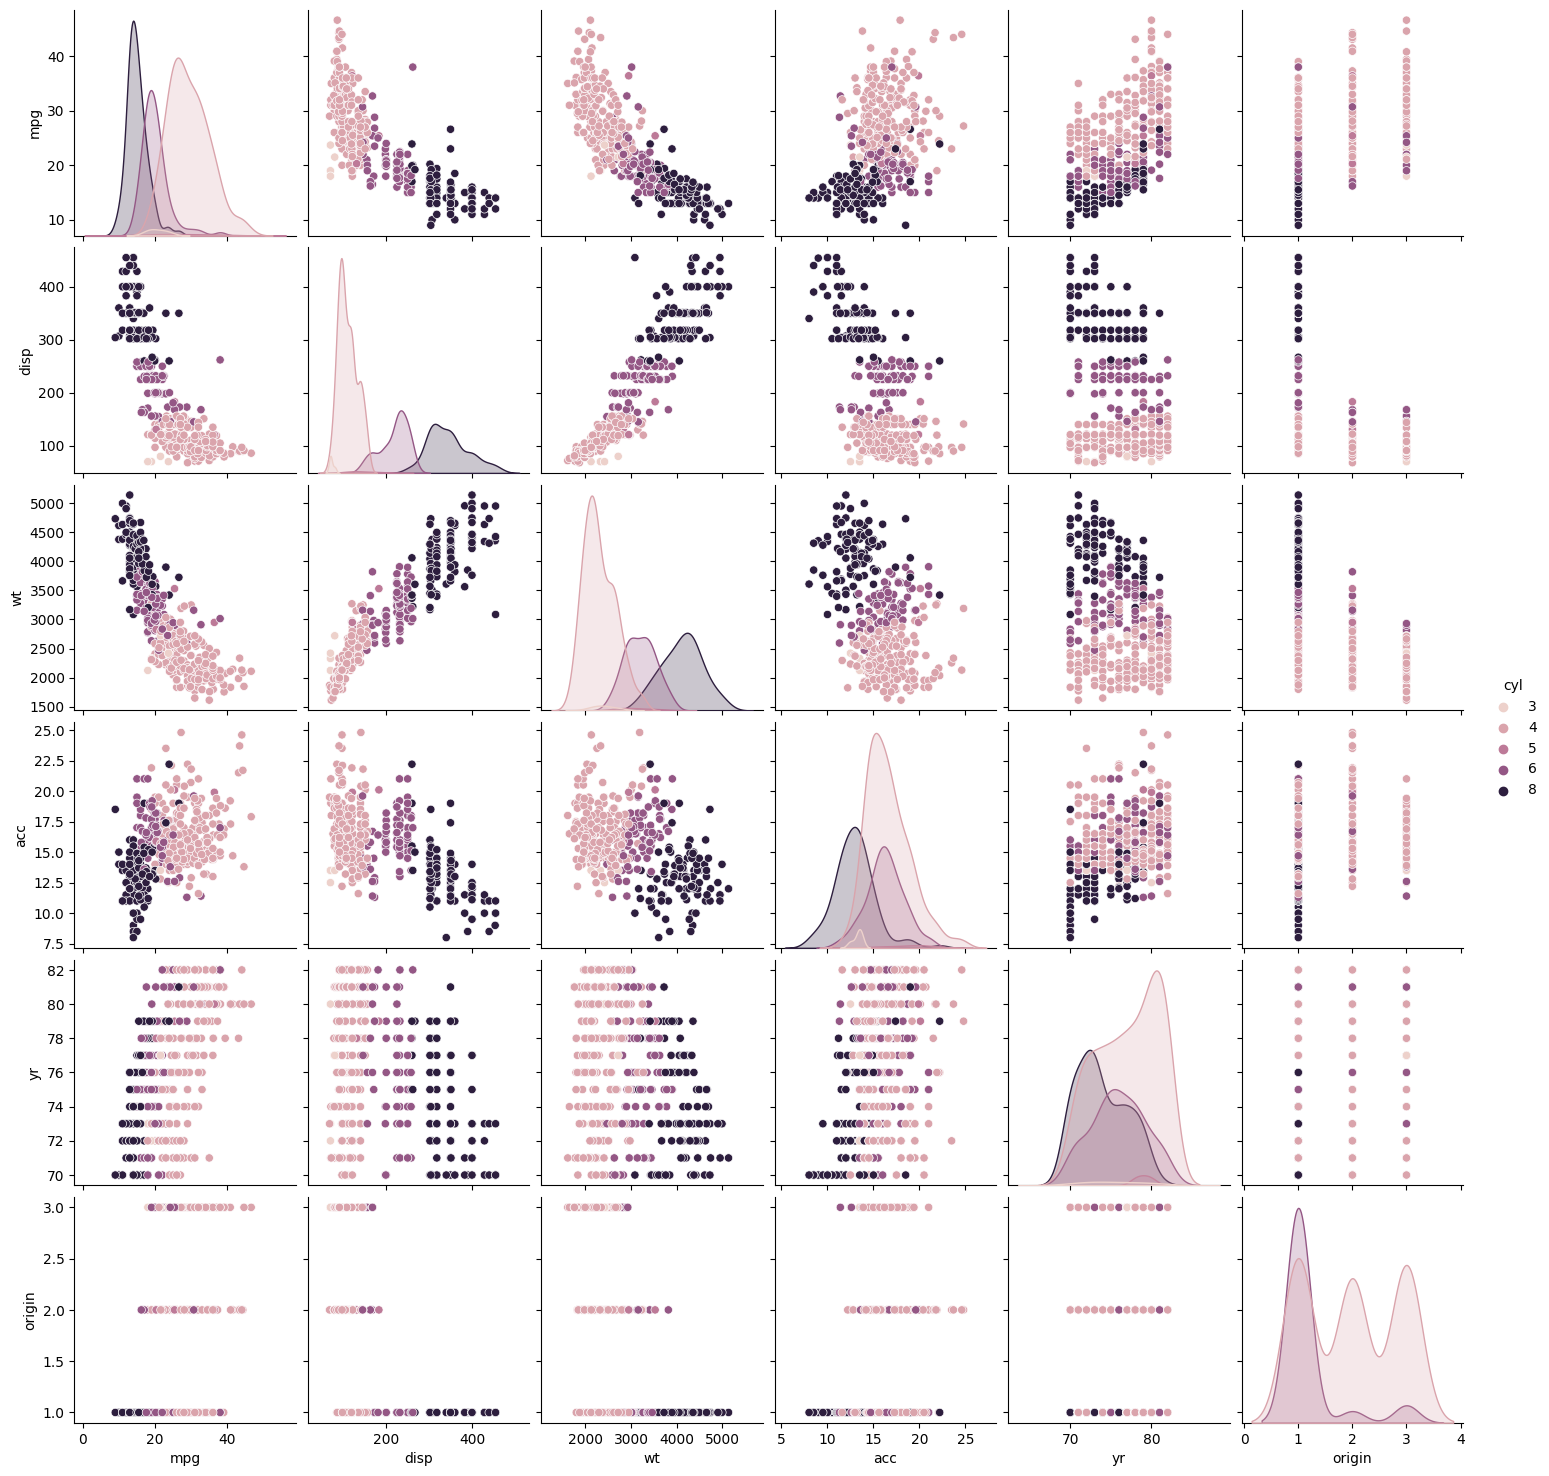

In [5]:
# 2C. Plot a pairplot for all features.
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
sns.pairplot(car_data,hue='cyl');

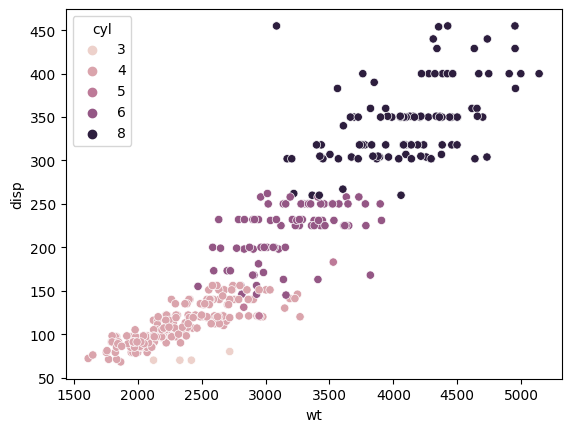

In [6]:
# 2D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(x='wt',y='disp',hue='cyl',data=car_data);

#### 2E. Insights from 2D
- weight has a positive linear relationship with cylinder displacement.
- Obviously, more the no. of cylinders, car has more weight and cylinder displacement.
- 4 and 8 cylinders cars are more predominant, more than 3,5 & 6 cylinder cars.

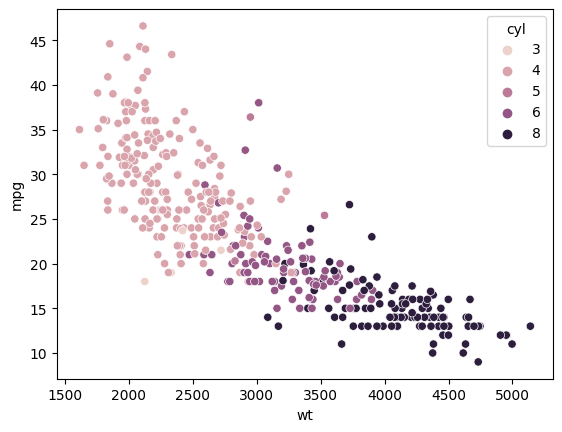

In [7]:
# 2F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(x='wt',y='mpg',hue='cyl',data=car_data);

### 2G. Insights for Q2.f
- Mileage and weight are inversely proportional
- As weigh is positively co-related with weight (as per 2D), therefore, mileage is inversely proportional to the number of cylinder as well. 

In [8]:
# 2H. Check for unexpected values in all the features and datapoints with such values.
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
# As per above only unexpected datatype is for 'hp' (Horsepower) column
# This column must be of type 'int' but it is of type 'object'

#So. let's examin for non-digit values of this column
for i in car_data['hp']:
    if not str(i).isdigit():
        print(i)

?
?
?
?
?
?


In [10]:
#So, some value contains '?', so let's replace it with NaN
car_data['hp'] = np.where(car_data['hp']=='?',np.nan,car_data['hp'])

#Now, convert the column type to 'float64'
car_data['hp'] = car_data['hp'].astype('float64')

#Let's check the missing value now
car_data.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [11]:
#Let's replace missing value with median
car_data.fillna((car_data['hp'].median()), inplace=True)

#Let's check the missing value now
car_data.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

3. Clustering: [15 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Apply K-Means clustering for 2 to 10 clusters. [3 Marks] </li>
    <li> Plot a visual and find elbow point. [2 Marks] </li>
    <li> On the above visual, highlight which are the possible Elbow points. [1 Marks] </li>
    <li> Train a K-means clustering model once again on the optimal number of clusters. [3 Marks] </li>
    <li> Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks] </li>
    <li> Plot a visual and color the datapoints based upon clusters. [2 Marks] </li>
    <li> Pass a new DataPoint and predict which cluster it belongs to. [2 Marks] </li>
    </ol>

In [12]:
#import necessary modules
from sklearn.cluster import KMeans
from scipy.stats import zscore

#3A. Apply K-Means clustering for 2 to 10 clusters.

#Let's create the X dataset without the car name column
X = car_data.drop('car_name',axis=1)


X.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [13]:
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
# subtract year from 83 to get the age

# Calculate age of vehicle
X['age'] = 83-X['yr']
X.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,13
1,15.0,8,350.0,165.0,3693,11.5,70,1,13
2,18.0,8,318.0,150.0,3436,11.0,70,1,13
3,16.0,8,304.0,150.0,3433,12.0,70,1,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,13


In [14]:
# Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(X['origin'],prefix='origin',drop_first=True, dtype='category')

# merge in main data frame
X = X.join(one_hot)
X.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin,age,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,13,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,13,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,13,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,13,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,13,False,False


In [15]:
# Let us now remove duplicate/irrelevant columns

X = X.drop(['yr','origin'], axis =1)

X.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,13,False,False
1,15.0,8,350.0,165.0,3693,11.5,13,False,False
2,18.0,8,318.0,150.0,3436,11.0,13,False,False
3,16.0,8,304.0,150.0,3433,12.0,13,False,False
4,17.0,8,302.0,140.0,3449,10.5,13,False,False


In [16]:

#Apply scaling to the X dataset using zscore only for numerical columns

numeric_cols = X.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
X[numeric_cols] =X[numeric_cols].apply(zscore)

#Now, change origin column datatype to 'int64'
X['origin_2'] = X['origin_2'].astype('int64')
X['origin_3'] = X['origin_3'].astype('int64')


X.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_2,origin_3
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1.627426,0,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,1.627426,0,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,1.627426,0,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,1.627426,0,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,1.627426,0,0


In [17]:
#Let's create the KMeans model with 2 to 10 clusters - will do 1 to 10, to check elbow points at 2
kmeans_models = [KMeans(n_clusters=i,random_state=0, n_init=10) for i in range(1,11)]

#Let's fit the model with the X dataset
for model in kmeans_models:
    model.fit(X)

#Let's create the inertia list for all the models
inertia_list = [model.inertia_ for model in kmeans_models]

#Let's print the inneria values for each cluster value
for i in range(1,11):
    print(f'Inertia for {i} clusters is {inertia_list[i-1]}')


Inertia for 1 clusters is 2907.0075376884415
Inertia for 2 clusters is 1404.0882432524093
Inertia for 3 clusters is 1049.8830826830908
Inertia for 4 clusters is 837.5308094880853
Inertia for 5 clusters is 761.3750214638717
Inertia for 6 clusters is 691.6296830743897
Inertia for 7 clusters is 638.2996704588091
Inertia for 8 clusters is 590.1113978192062
Inertia for 9 clusters is 559.7779536869781
Inertia for 10 clusters is 517.0870196563807


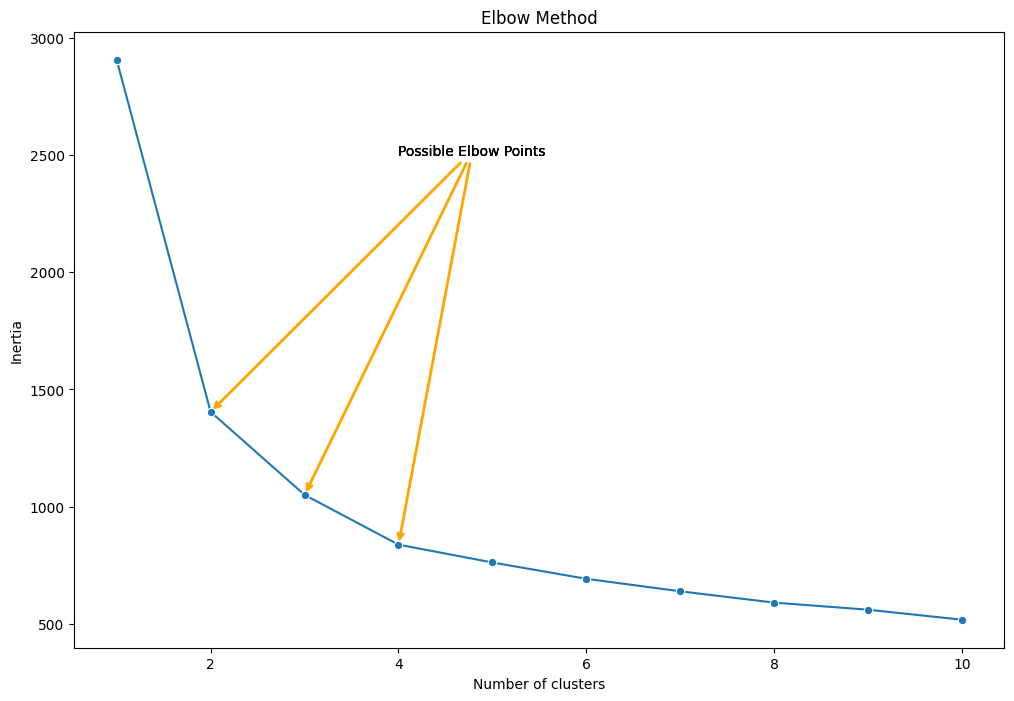

In [18]:
#3B. Plot a visual and find elbow point.

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertia_list, ax=ax,marker='o')
ax.set_title('Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')

#3C. On the above visual, highlight which are the possible Elbow points.

# Annotate arrow
ax.annotate('Possible Elbow Points', xy=(2,1404.0882432524093), xytext=(4, 2500), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))


ax.annotate('Possible Elbow Points', xy=(3,1049.8830826830908), xytext=(4, 2500), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))

ax.annotate('Possible Elbow Points', xy=(4, 837.5308094880853), xytext=(4, 2500), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))


plt.show()


Silhouette Coefficient for 2 clusters is 0.4451036786088759
Silhouette Coefficient for 3 clusters is 0.33136613222208966
Silhouette Coefficient for 4 clusters is 0.3275121670214888
Silhouette Coefficient for 5 clusters is 0.2973863615320737
Silhouette Coefficient for 6 clusters is 0.2549427226947069
Silhouette Coefficient for 7 clusters is 0.25508991617797755
Silhouette Coefficient for 8 clusters is 0.24954994068066383
Silhouette Coefficient for 9 clusters is 0.24436233139303604
Silhouette Coefficient for 10 clusters is 0.2446513400100237


Text(0, 0.5, 'silhouette Coefficient')

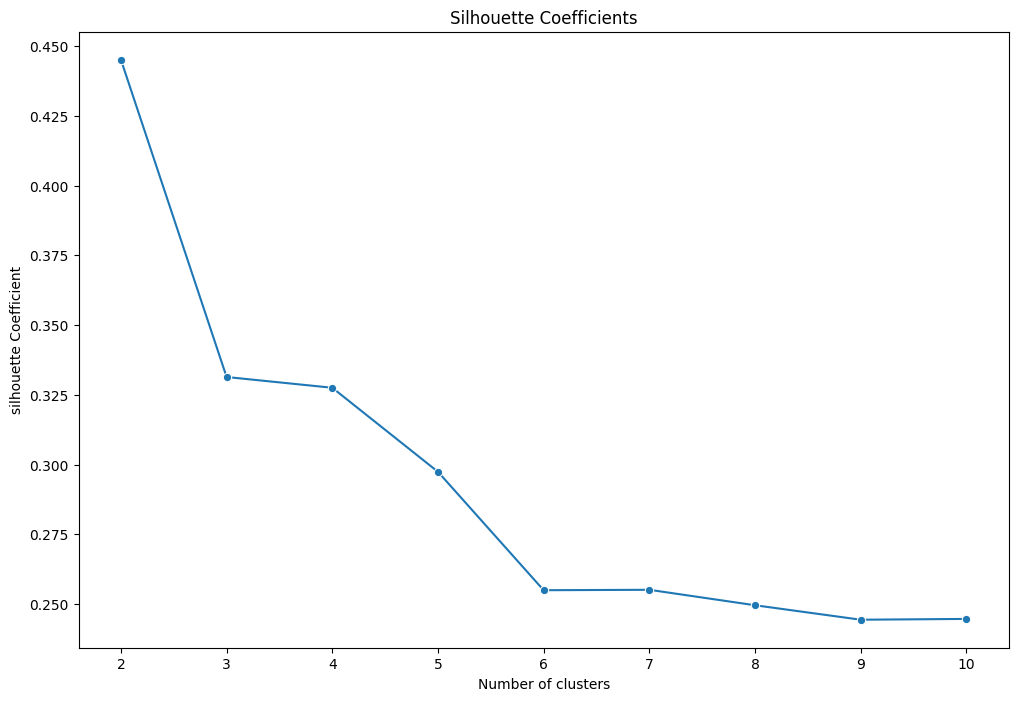

In [22]:
#3D. Train a K-means clustering model once again on the optimal number of clusters.

#There are three potential optimal cluster values - 2, 3 and 4
#let's calculate silhouette scores to find optimal cluster value

from sklearn.metrics import silhouette_score


silhouette_score_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X,kmeans.labels_)
    print(f'Silhouette Coefficient for {k} clusters is {score}')
    silhouette_score_list.append(score)


fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=range(2,11), y=silhouette_score_list, ax=ax,marker='o')
ax.set_title('Silhouette Coefficients')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('silhouette Coefficient')



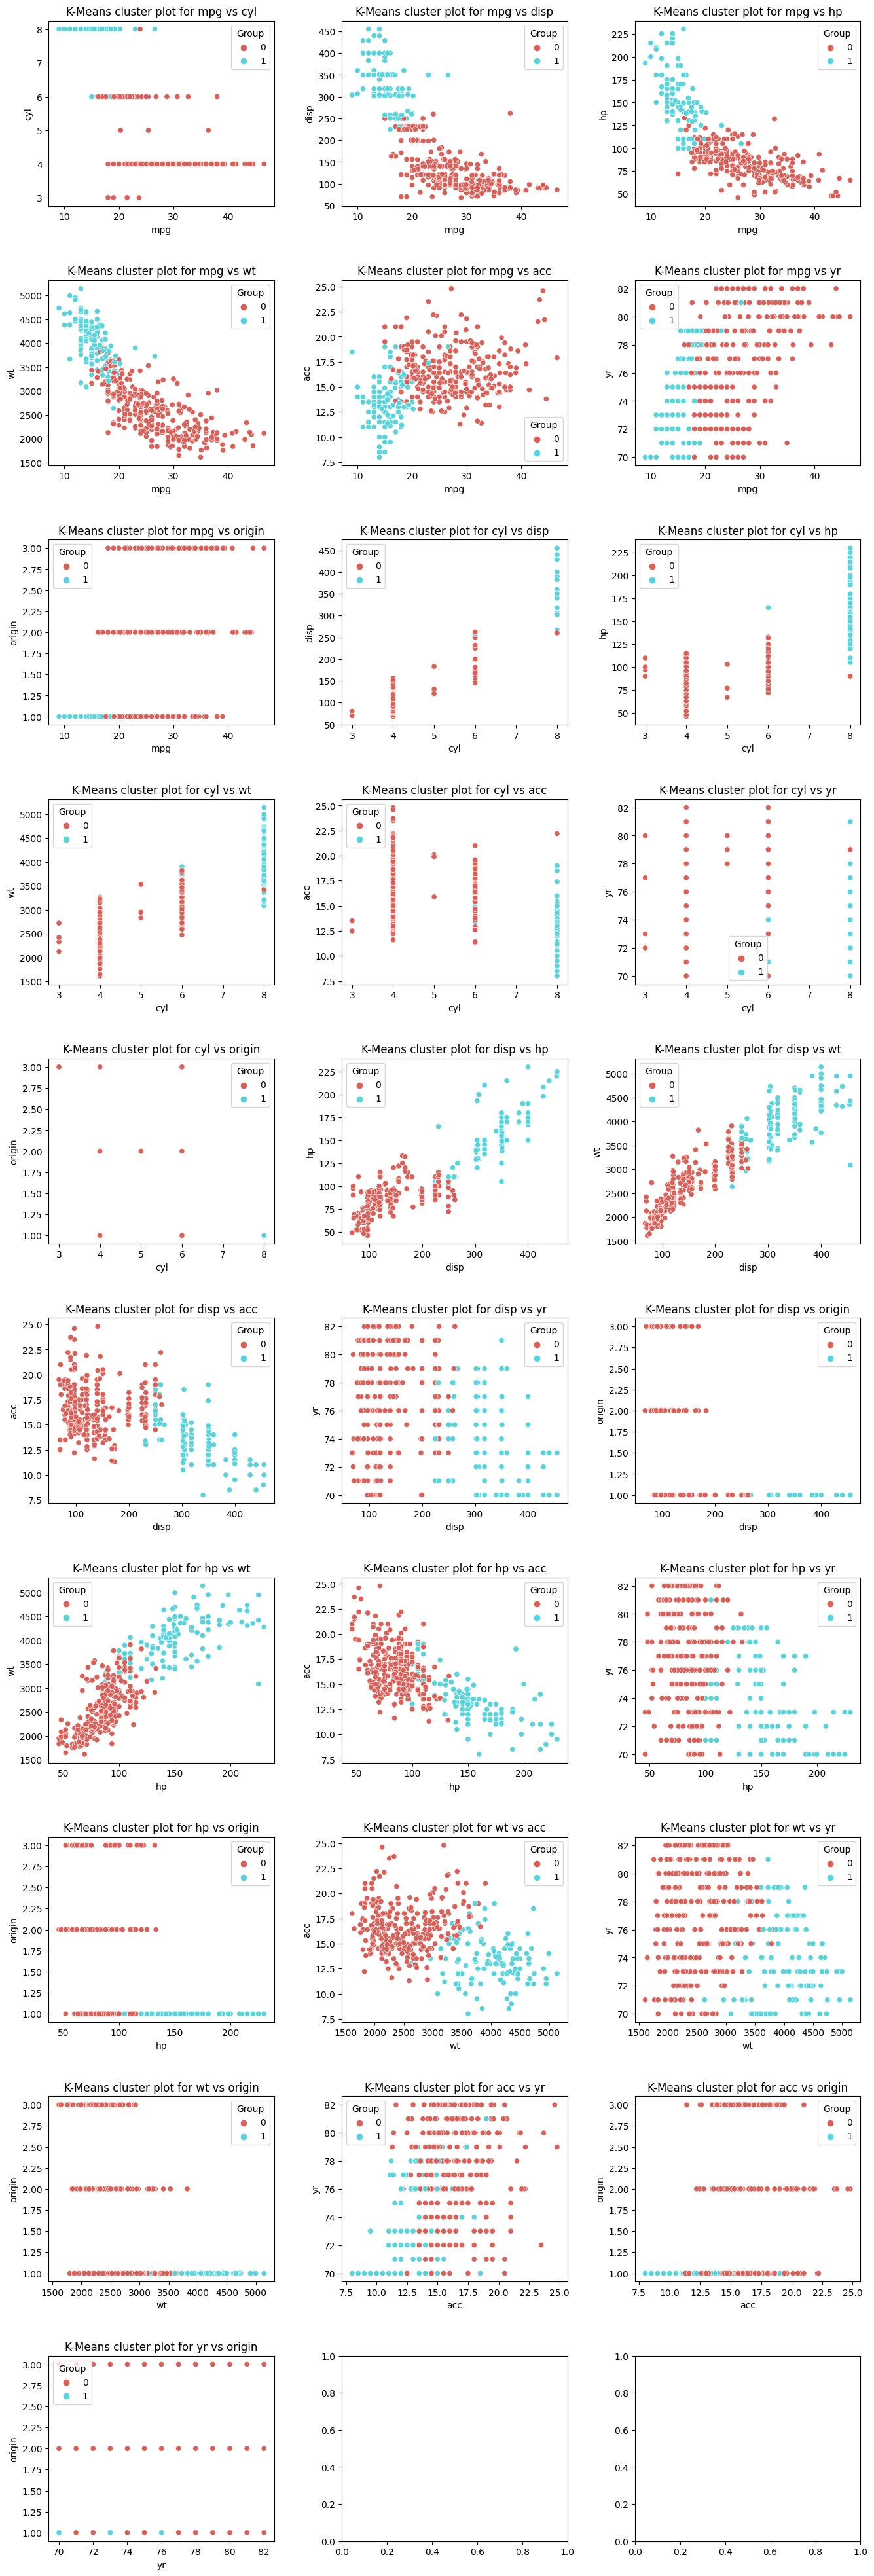

In [24]:
#Best silhouette coeffcient is for 2 clusters (0.4451) (closet to 1 is the best)

#Let's do the KMeans with 2 clusters

n_clusters=2

kmeans_model_2 = KMeans(n_clusters=n_clusters,random_state=0, n_init=10)
kmeans_model_2.fit(X)

#3E. Add a new feature in the DataFrame which will have labels based upon cluster value. 
car_data["Group"] = kmeans_model_2.labels_

#3F. Plot a visual and color the datapoints based upon clusters. 

#Let's plot the scatter plot for each pair of features with color based on cluster
#There will be 8*7/2=28 plots - arranging them in 10 rows and 3 columns

fig, axes=plt.subplots(10,3,figsize=(16, 50))

r = 0
c = 0
cols=['mpg','cyl','disp','hp','wt','acc','yr','origin']
s=1
for col1 in cols:
    for col2 in cols[s:]:
        sns.scatterplot(ax=axes[r,c],x=car_data[col1], y=car_data[col2], hue=car_data["Group"], 
            palette=sns.color_palette('hls', n_clusters))
        axes[r,c].title.set_text(f"K-Means cluster plot for {col1} vs {col2}")
        c = c+1
        if c == 3:
            r = r+1
            c = 0
    s = s+1

fig.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()


In [25]:
#3G. Pass a new DataPoint and predict which cluster it belongs to.

def predict_kmeans_2_cluster(mpg, cyl, disp, hp, wt, acc, yr, origin):

    #Add the new data point to the car_data dataset
    new_data_point = pd.DataFrame({'mpg':mpg, 'cyl':cyl, 'disp':disp, 'hp':hp, 'wt':wt, 'acc':acc, 'yr':yr, 'origin':origin, },index=[0])
    car_data_predict = pd.concat([car_data,new_data_point],axis=0,ignore_index=True)

    #We have do the same preprocessing as we did for the X dataset during K-Means modelling

    #Create X data set from this new dataset without car_name and labels_2 columns
    X_predict = car_data_predict.drop(['car_name','Group'],axis=1)

    #1. Convert yr column into age and drop yr column
    X_predict['age'] = 83-X_predict['yr']
    X_predict = X_predict.drop('yr',axis=1)


    #2. One-hot encode origin column
    one_hot = pd.get_dummies(X_predict['origin'],prefix='origin',drop_first=True, dtype='category')
    X_predict = X_predict.join(one_hot)
    X_predict = X_predict.drop('origin',axis=1)
    
    #3. Now apply zscore scaling to this for numerical columns
    numeric_cols = X_predict.select_dtypes(include=[np.int64, np.float64]).columns
    X_predict[numeric_cols] =X_predict[numeric_cols].apply(zscore)

    #4. Change origin column datatype to 'int64'
    X_predict['origin_2'] = X_predict['origin_2'].astype('int64')
    X_predict['origin_3'] = X_predict['origin_3'].astype('int64')
    
    #5. Now predict the cluster
    #Last row is our new data point - so get prediction for that only
    predicted_label = kmeans_model_2.predict(X_predict.tail(1))[0]

    print(f'Predicted label for car (mpg={mpg},cyl={cyl},disp={cyl},hp={hp},wt={wt},acc={acc},yr={yr},origin={origin}) = {predicted_label} ')

#Let's predict for new data point:

# mpg=18,cyl=8,disp=350,hp=130,wt=3504,acc=12,yr=70,origin=1
predict_kmeans_2_cluster(18,8,350,130,3504,12,70,1)

# mpg=30,cyl=4,disp=150,hp=100,wt=2504,acc=8,yr=72,origin=2
predict_kmeans_2_cluster(30,4,150,100,2504,8,72,2)



Predicted label for car (mpg=18,cyl=8,disp=8,hp=130,wt=3504,acc=12,yr=70,origin=1) = 1 
Predicted label for car (mpg=30,cyl=4,disp=4,hp=100,wt=2504,acc=8,yr=72,origin=2) = 0 


#### PART B - 30 Marks

- **DOMAIN** **_:_** Automobile

- **CONTEXT** **_:_** The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
    vehicle may be viewed from one of many different angles.

- **DATA DESCRIPTION:** The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
    used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
    was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
    distinguish between the cars.
 - All the features are numeric i.e. geometric features extracted from the silhouette.


- **PROJECT OBJECTIVE** **_:_** Apply dimensionality reduction technique – PCA and train a model and compare relative results.

- **STEPS AND TASK [30 Marks]:**

In [26]:
#Import necessary modules
from sklearn.svm import SVC
from sklearn.metrics import classification_report, make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold

1. Data Understanding & Cleaning: [5 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Read ‘vehicle.csv’ and save as DataFrame. [1 Marks] </li>
    <li> Check percentage of missing values and impute with correct approach. [1 Marks] </li>
    <li> Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks] </li>
    <li> Check for duplicate rows in the data and impute with correct approach. [1 Marks] </li>
    </ol>

In [27]:
#1A. Read 'vehicle.csv' and save as DataFramge
vehicles = pd.read_csv('vehicle.csv')
vehicles.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [28]:
#1B. Check percentage of missing values and impute with correct approach.
vehicles.isnull().sum()/len(vehicles)*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

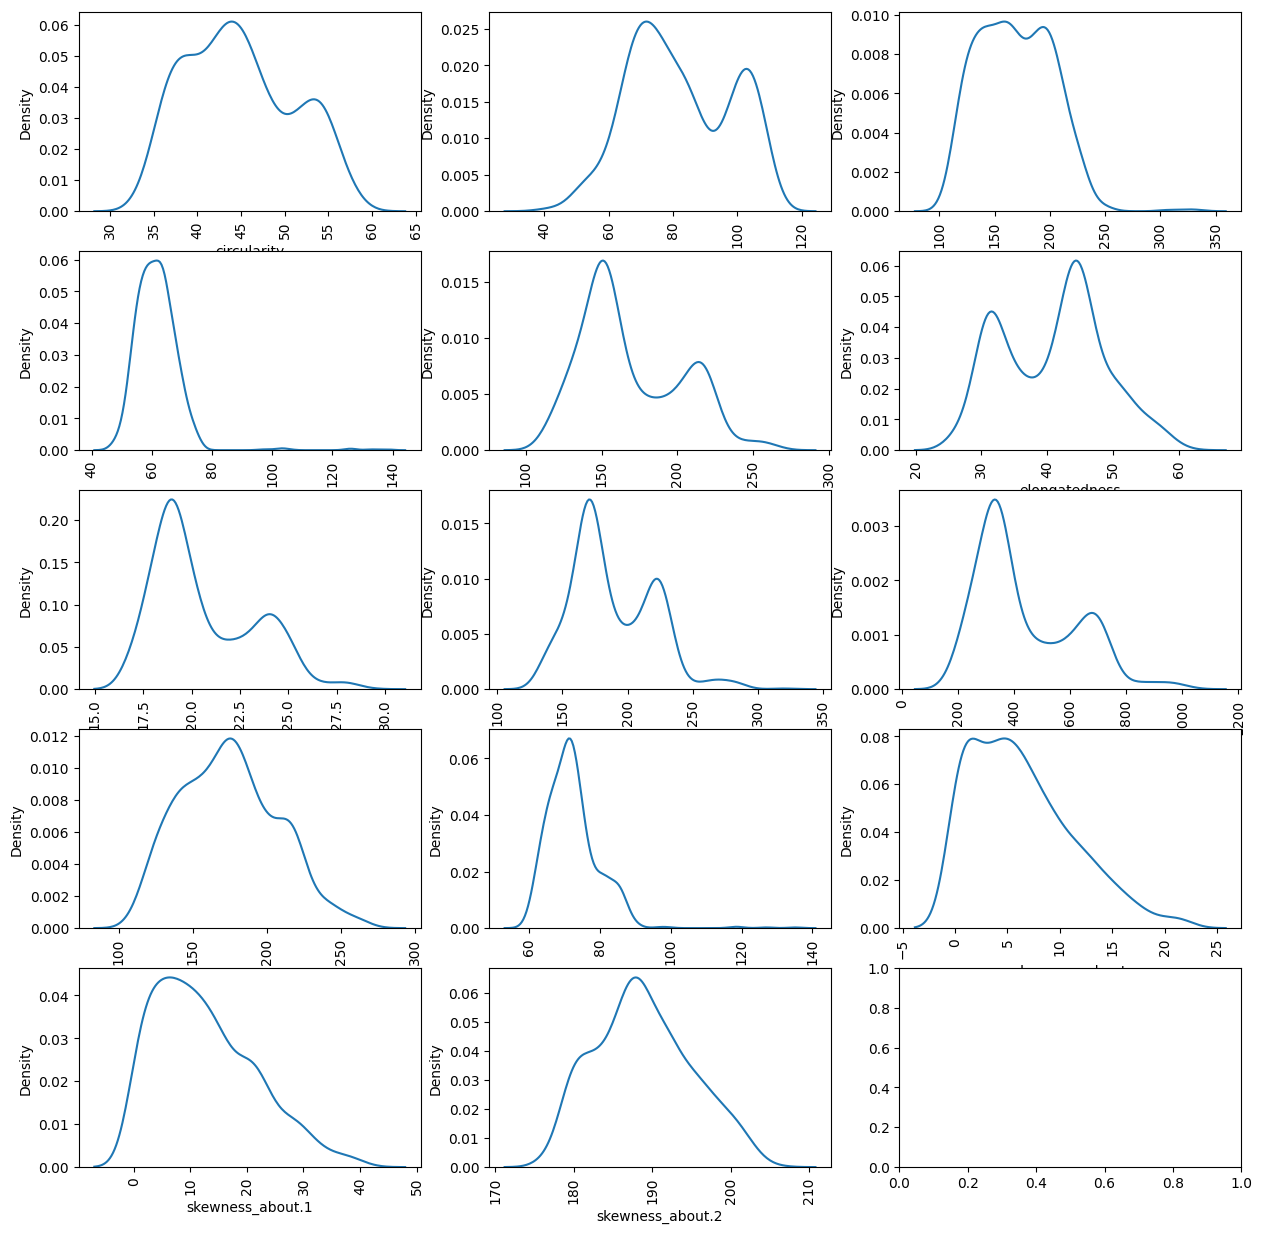

In [29]:
#Columns circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 have missing values 
missing_values_columns=['circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2']

#Let's plot the KDE distribution for these columns
fig, ax = plt.subplots(5,3, figsize=(15, 15))
for variable, subplot in zip(missing_values_columns, ax.flatten()):
    sns.kdeplot(vehicles[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

        

In [30]:
#Looking at above, it makes sence to replace missing values with median (as all the columns are somewhat skewed)
#Let's replace missing values with median
for col in missing_values_columns:
    vehicles[col].fillna(vehicles[col].median(), inplace=True)

In [31]:
#Check the missing values %-age again
vehicles.isnull().sum()/len(vehicles)*100

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

<Axes: ylabel='count'>

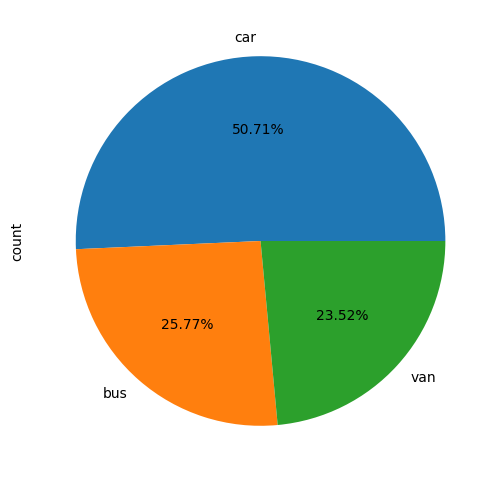

In [32]:
#1B. Visualize a Pie-chart and print percentage of values for variable ‘class’.
vehicles['class'].value_counts().plot(kind='pie',figsize=(11, 6),autopct='%1.2f%%')

In [33]:
#1D. Check for duplicate rows in the data and impute with correct approach.
vehicles.duplicated().sum()

0

- No duplicate present, so nothing to do here.

2. Data Preparation: [2 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Split data into X and Y. [Train and Test optional] [1 Marks] </li>
    <li> Standardize the Data. [1 Marks] </li>
    </ol>

In [34]:
#2A. Split data into X and y.
X = vehicles.drop('class',axis=1)
y = vehicles['class']

In [35]:
#2B. Standardize the data.
scaler = StandardScaler()
X = scaler.fit_transform(X)

3. Model Building: [13 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Train a base Classification model using SVM. [1 Marks] </li>
    <li> Print Classification metrics for train data. [1 Marks] </li>
    <li> Apply PCA on the data with 10 components. [3 Marks] </li>
    <li> Visualize Cumulative Variance Explained with Number of Components. [2 Marks] </li>
    <li> Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks] </li>
    <li> Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks] </li>
    <li> Train SVM model on components selected from above step. [1 Marks] </li>
    <li> Print Classification metrics for train data of above model and share insights. [2 Marks] </li>
    </ol>

In [36]:
#3A. Train a base Classification model using SVM
svm_model = SVC()
svm_model.fit(X,y)


SVC()

In [37]:
#3B. Print classification metrics for train dats
y_pred = svm_model.predict(X)
print(classification_report(y,y_pred))

accuracy_all_columns_base_SVC = accuracy_score(y,y_pred)

              precision    recall  f1-score   support

         bus       0.99      0.98      0.98       218
         car       0.99      0.98      0.99       429
         van       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



In [38]:
#3C. Apply PCA on the data with 10 components.
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)


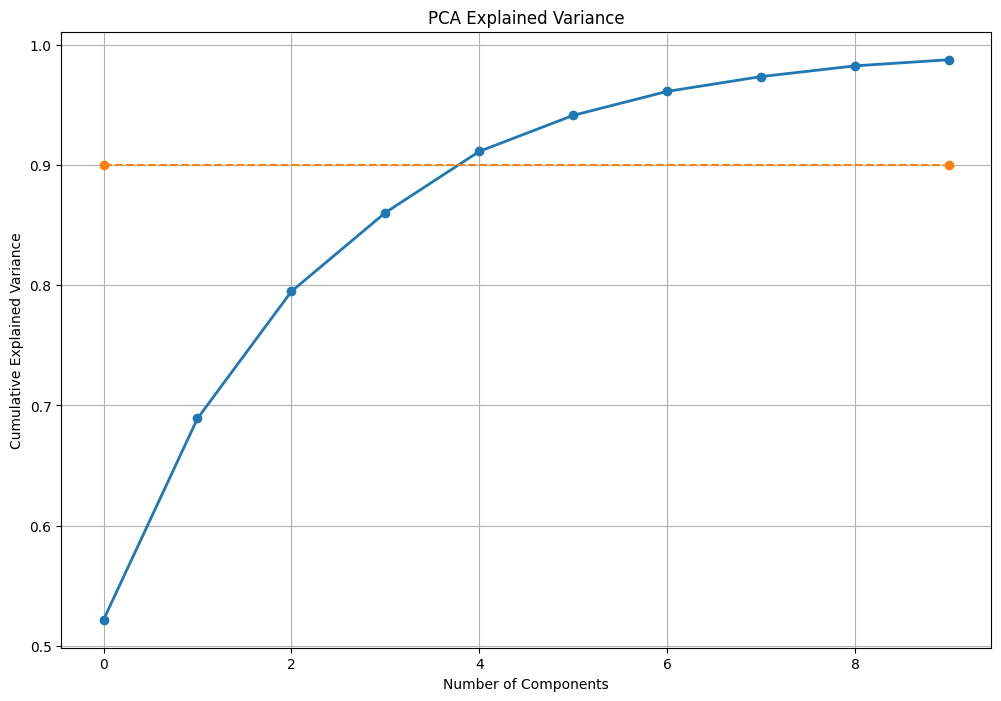

In [39]:
#3D. Visualize Cumulative Variance Explained with Number of Components. 
#3E. Draw a horizontal line on the above plot to highlight the threshold of 90%.
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),linewidth=2,marker='o')
plt.plot((0,9),(0.9,0.9),'--',marker='o') # 90% threshold line
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [40]:
#3F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.
pca = PCA(n_components=4)  # 4 components are explaining little more than 90% variance
X_pca_4=pca.fit_transform(X)

#3G. Train SVM model on components selected from above step. 
svm_model.fit(X_pca_4,y)

#3H. Print Classification metrics for train data of above model and share insights.
y_pred = svm_model.predict(X_pca_4)
print(classification_report(y,y_pred)) 

accuracy_PCA_4_columns_base_SVC = accuracy_score(y,y_pred)

              precision    recall  f1-score   support

         bus       0.85      0.66      0.74       218
         car       0.83      0.90      0.86       429
         van       0.67      0.73      0.70       199

    accuracy                           0.80       846
   macro avg       0.79      0.76      0.77       846
weighted avg       0.80      0.80      0.79       846



### Insights
- Accuracy is now reduced to 80% on training data
- All other metrics also reduced as well.
- This is because now training data is explaining little above 90% variance.

4. Performance Improvement: [5 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks] </li>
    <li> Share best Parameters observed from above step. [1 Marks] </li>
    <li> Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks] </li>
    </ol>

In [42]:
#4A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. 

#We will use accuracy as measure of best score
acc_scorer = make_scorer(accuracy_score)

#I shall try with different values of C and gamma in the 10th power range of -3 to 3
power_ranges = [-3,-2,-1,0,1,2,3]
C_range = [10 ** i for i in power_ranges]
gamma_range = [10 ** i for i in power_ranges]

#I shall use only two kernels: 'rbf' and 'linear', as the features we reduced to have only 4, so trying linear model as well. 
kernels = ['rbf', 'linear' ] 

#Now do the search for best parameters
parameters = {'kernel':kernels, 'C':C_range, 'gamma':gamma_range}
svc = SVC()
svc_tuned = GridSearchCV(svc, parameters, scoring=acc_scorer)
svc_tuned.fit(X_pca_4, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             scoring=make_scorer(accuracy_score))

In [43]:
#4B. Share best parameters observed from above steps.
svc_tuned.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
#4C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.
y_pred = svc_tuned.predict(X_pca_4)
print(classification_report(y,y_pred))

accuracy_PCA_4_columns_tuned_SVC = accuracy_score(y,y_pred)

              precision    recall  f1-score   support

         bus       0.88      0.81      0.84       218
         car       0.88      0.92      0.90       429
         van       0.78      0.77      0.77       199

    accuracy                           0.86       846
   macro avg       0.85      0.83      0.84       846
weighted avg       0.86      0.86      0.86       846



In [45]:
#Print accuracy improvement for all the models
print(f'Accuracy for base SVC model with all columns                  = {accuracy_all_columns_base_SVC}')
print(f'Accuracy for PCA 4 components SVC model                       = {accuracy_PCA_4_columns_base_SVC}')
print(f'Accuracy for PCA 4 components SVC model with tuned parameters = {accuracy_PCA_4_columns_tuned_SVC}')

Accuracy for base SVC model with all columns                  = 0.9810874704491725
Accuracy for PCA 4 components SVC model                       = 0.7966903073286052
Accuracy for PCA 4 components SVC model with tuned parameters = 0.8569739952718676


### Insights
- Accuracy is best when used all columns for training data. This is because, all information including noise is captured here. Most likely, model is overfitted here.
- With 4 PCA components, accuracy is improved to 86% in tuned model compared to base model (80%)
- All individual and average recalls, preceisions, f1-score for the classes also improved for 4 PCA component model after tuning.

5. Data Understanding & Cleaning: [5 Marks]
    <ol style="list-style-type: upper-alpha;">
    <li> Explain pre-requisite/assumptions of PCA. [2 Marks] </li>
    <li> Explain advantages and limitations of PCA. [3 Marks] </li>
    </ol>

#### 5A. Pre-requisite/assumptions of PCA.

PCA relies on several assumptions and prerequisites:

1. **Linearity:** PCA assumes that the relationships between variables in the dataset are linear. It seeks to find orthogonal linear combinations of variables that capture the most significant variation in the data. 

2. **Standardization or Normalization:** PCA is sensitive to the scale of the input variables. It assumes that variables are on similar scales, as variables with larger scales can dominate the principal components. Therefore, it's essential to standardize or normalize the data before applying PCA. Standardization typically involves transforming the data to have a mean of 0 and a standard deviation of 1.

3. **Mean-Centered Data:** PCA assumes that the data is mean-centered, meaning that the mean of each variable is subtracted from that variable's values. Centering the data is crucial because PCA focuses on the variance-covariance structure of the data, and centering removes the effect of the mean.

4. **Orthogonality of Principal Components:** PCA assumes that the resulting principal components are orthogonal to each other. This orthogonality ensures that each principal component captures a unique aspect of the data's variance. If the components are not orthogonal, the interpretation of the components becomes more challenging.

5. **Large Variance Components Are Important:** PCA is designed to capture the most significant sources of variation in the data. It assumes that the components with the largest variances are the most important for describing the data. 

6. **Continuous Data:** PCA is most commonly applied to continuous data. It is typically not used for purely categorical data.

7. **Data Adequacy:** PCA assumes that the dataset is sufficiently large and diverse to represent the underlying population or phenomena adequately. Inadequate or biased sampling can lead to PCA results that do not accurately reflect the true structure of the data.

8. **Linear Independence:** The variables in the dataset should be linearly independent. If two or more variables are perfectly correlated or exhibit a near-linear relationship, it can cause numerical instability in the PCA computations.


#### 5B. Advantages and limitations of PCA.

PCA has several advantages and limitations:

**Advantages of PCA:**

1. **Dimensionality Reduction:** PCA is primarily used for dimensionality reduction. It can transform a high-dimensional dataset into a lower-dimensional one while retaining as much of the original variance as possible. This can help simplify complex datasets and make them more manageable for analysis.

2. **Feature Selection:** PCA identifies the most important features in a dataset by ranking them based on their contribution to the total variance. This can be useful for feature selection in machine learning and data modeling, as it can help eliminate redundant or less informative features.

3. **Visualization:** PCA can be used to visualize high-dimensional data in a lower-dimensional space, typically two or three dimensions. This makes it easier to explore and understand the data, especially when plotting or creating scatterplots.

4. **Noise Reduction:** PCA can help in reducing the impact of noise in data. By retaining only the most significant principal components, it filters out noise or random fluctuations that may exist in high-dimensional datasets.

5. **Orthogonal Transformation:** PCA performs an orthogonal transformation, which means that the resulting principal components are uncorrelated. This can be advantageous when dealing with multicollinearity among variables in statistical modeling.

**Limitations of PCA:**

1. **Linearity:** PCA assumes that the underlying data relationships are linear. If the data has complex, nonlinear relationships, PCA may not capture the essential structure effectively. Nonlinear techniques like Kernel PCA can be used to address this limitation.

2. **Loss of Interpretability:** While PCA is excellent for dimensionality reduction, the resulting principal components are often difficult to interpret in terms of the original features. They are linear combinations of the original variables and may not have clear real-world meaning.

3. **Information Loss:** PCA aims to retain as much variance as possible, but it may still lead to some information loss, especially when reducing the dimensionality significantly. Researchers and analysts must strike a balance between dimensionality reduction and information preservation.

4. **Sensitivity to Scaling:** PCA is sensitive to the scale of the input variables. Variables with larger scales can dominate the principal components, leading to biased results. It's essential to standardize or normalize the data before applying PCA to address this issue.

5. **Assumption of Orthogonality:** PCA assumes that the principal components are orthogonal (uncorrelated), which may not always hold true in practice. 

6. **Limited to Linear Transformations:** PCA can only capture linear relationships in the data. It may not capture complex, nonlinear patterns present in some datasets.

